In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# setup latex formatting
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif', size=28)
rc('axes', labelsize=28)

## Preprocess data

In [3]:
data = pd.read_csv('bb84_test.csv')
data.sample(10)

,noisy,t1,eavesdrop,QBER,key_len
11,True,10.0,True,0.277344,256
26,True,0.3,False,0.154506,233
25,True,0.3,False,0.210714,280
38,True,0.03,False,0.533597,253
47,True,0.01,True,0.485714,245
21,True,1.0,True,0.258824,255
36,True,0.03,False,0.517699,226
27,True,0.3,True,0.304833,269
9,True,10.0,True,0.237736,265
30,True,0.1,False,0.342205,263


### Split into noise, no noise, eavesdrop, no eavesdrop ...

In [4]:
data_w_noise  = data[data['noisy']].drop(columns=['noisy'])
data_no_noise = data[np.logical_not(data['noisy'])].drop(columns=['noisy', 't1'])

In [5]:
data_w_noise_w_eavesdrop  = data_w_noise[data_w_noise['eavesdrop']].drop(columns=['eavesdrop'])
data_w_noise_no_eavesdrop = data_w_noise[np.logical_not(data_w_noise['eavesdrop'])].drop(columns=['eavesdrop'])

## Plot key length and QBER against coherence time

In [6]:
coherence_times = data_w_noise_no_eavesdrop['t1'].unique()
results = pd.DataFrame(data = coherence_times, columns=['t1'])

In [7]:
qber_w_eavesdrop_means  = []
qber_no_eavesdrop_means = []
qber_w_eavesdrop_stdevs  = []
qber_no_eavesdrop_stdevs = []

key_len_w_eavesdrop_means  = []
key_len_no_eavesdrop_means = []
key_len_w_eavesdrop_stdevs  = []
key_len_no_eavesdrop_stdevs = []

for t1 in coherence_times:
    qber_w_eavesdrop_vals  = data_w_noise_w_eavesdrop [data_w_noise_w_eavesdrop ['t1']==t1]['QBER'].values
    qber_no_eavesdrop_vals = data_w_noise_no_eavesdrop[data_w_noise_no_eavesdrop['t1']==t1]['QBER'].values
    key_len_w_eavesdrop_vals  = data_w_noise_w_eavesdrop [data_w_noise_w_eavesdrop ['t1']==t1]['key_len'].values
    key_len_no_eavesdrop_vals = data_w_noise_no_eavesdrop[data_w_noise_no_eavesdrop['t1']==t1]['key_len'].values
    
    qber_w_eavesdrop_means .append(np.mean(qber_w_eavesdrop_vals))
    qber_no_eavesdrop_means.append(np.mean(qber_no_eavesdrop_vals))
    key_len_w_eavesdrop_means .append(np.mean(key_len_w_eavesdrop_vals))
    key_len_no_eavesdrop_means.append(np.mean(key_len_no_eavesdrop_vals))
    
    qber_w_eavesdrop_stdevs .append(np.std(qber_w_eavesdrop_vals))
    qber_no_eavesdrop_stdevs.append(np.std(qber_no_eavesdrop_vals))
    key_len_w_eavesdrop_stdevs .append(np.std(key_len_w_eavesdrop_vals))
    key_len_no_eavesdrop_stdevs.append(np.std(key_len_no_eavesdrop_vals))
    
results['qber_mean_w_eavesdrop']  = qber_w_eavesdrop_means
results['qber_mean_no_eavesdrop'] = qber_no_eavesdrop_means
results['key_len_mean_w_eavesdrop']  = key_len_w_eavesdrop_means
results['key_len_mean_no_eavesdrop'] = key_len_no_eavesdrop_means

results['qber_stdev_w_eavesdrop']  = qber_w_eavesdrop_stdevs
results['qber_stdev_no_eavesdrop'] = qber_no_eavesdrop_stdevs
results['key_len_stdev_w_eavesdrop']  = key_len_w_eavesdrop_stdevs
results['key_len_stdev_no_eavesdrop'] = key_len_no_eavesdrop_stdevs

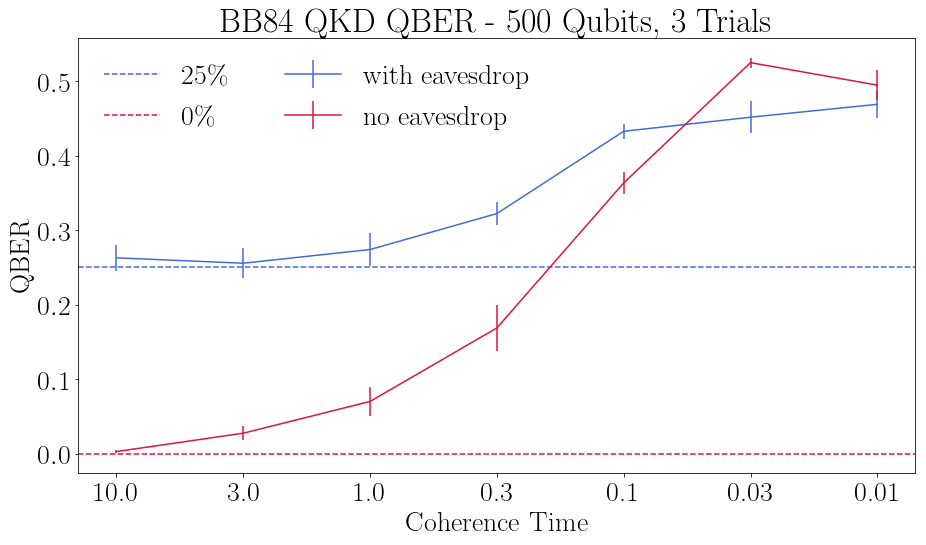

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
# plot
ax.errorbar(results['t1'], results['qber_mean_w_eavesdrop'] , yerr=results['qber_stdev_w_eavesdrop'], label=r'with eavesdrop', color='royalblue')
ax.errorbar(results['t1'], results['qber_mean_no_eavesdrop'], yerr=results['qber_stdev_no_eavesdrop'], label=r'no eavesdrop' , color='crimson')
ax.axhline(0.25, linestyle='--', color='royalblue', label=r'25\%')
ax.axhline(0.00, linestyle='--', color='crimson'  , label=r'0\%')
# format
ax.legend(frameon=False, ncol=2)
ax.set_xlabel(r'Coherence Time')
ax.set_ylabel(r'QBER')
ax.set_title(r'BB84 QKD QBER - 500 Qubits, 3 Trials')
# save and display
fig.savefig('bb84_qkd_500x3_qber.pdf', bbox_to_inches='tight')

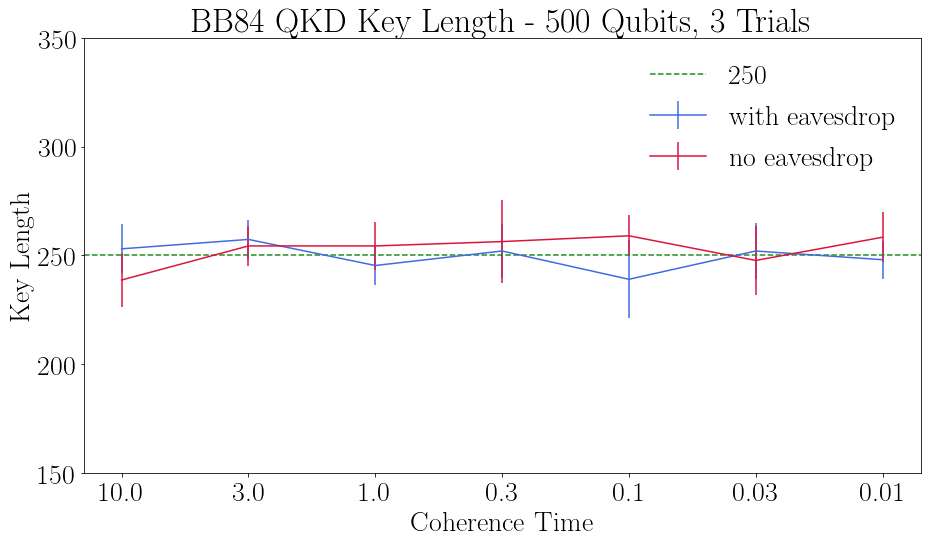

In [9]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
# plot
ax.errorbar(results['t1'], results['key_len_mean_w_eavesdrop'] , yerr=results['key_len_stdev_w_eavesdrop'], label=r'with eavesdrop', color='royalblue')
ax.errorbar(results['t1'], results['key_len_mean_no_eavesdrop'], yerr=results['key_len_stdev_no_eavesdrop'], label=r'no eavesdrop' , color='crimson')
ax.axhline(250, linestyle='--', color='forestgreen', label=r'250')
# format
ax.legend(frameon=False)
ax.set_xlabel(r'Coherence Time')
ax.set_ylabel(r'Key Length')
ax.set_title(r'BB84 QKD Key Length - 500 Qubits, 3 Trials')
ax.set_ylim([150,350])
# save and display
fig.savefig('bb84_qkd_500x3_qber.pdf', bbox_to_inches='tight')